# Pre-processing and exploration of the data

In [1]:
#Uploading of the necessary libraries:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import re

In [2]:
#Uploading of the datasets: 

DATASET_BEERADVOCATE = 'DATA/BeerAdvocate/'
DATASET_MATCHEDBEER = 'DATA/matched_beer_data/'
DATASET_RATEBEER = 'DATA/RateBeer/'

#Beer advocate dataset
df_adv_beer = pd.read_csv(DATASET_BEERADVOCATE + 'beers.csv')
df_adv_breweries = pd.read_csv(DATASET_BEERADVOCATE + 'breweries.csv')
df_adv_users = pd.read_csv(DATASET_BEERADVOCATE + 'users.csv')

#Matched beer dataset
df_md_beer = pd.read_csv(DATASET_MATCHEDBEER + 'beers.csv',skiprows=1)
df_md_beer_origin = pd.read_csv(DATASET_MATCHEDBEER + 'beers.csv', nrows=0)
df_md_breweries = pd.read_csv(DATASET_MATCHEDBEER + 'breweries.csv', skiprows=1)
df_md_breweries_origin = pd.read_csv(DATASET_MATCHEDBEER + 'breweries.csv', nrows=0)
df_md_users = pd.read_csv(DATASET_MATCHEDBEER + 'users.csv', skiprows=1)
df_md_users_origin = pd.read_csv(DATASET_MATCHEDBEER + 'users.csv', nrows=0)
df_md_users_approx = pd.read_csv(DATASET_MATCHEDBEER + 'users_approx.csv', skiprows=1)
df_md_users_approx_origin = pd.read_csv(DATASET_MATCHEDBEER + 'users_approx.csv', nrows=0)

##Add suffix of original dataset to columns' name
df_md_beer.columns = df_md_beer_origin.columns + '_' + df_md_beer.columns
df_md_breweries.columns = df_md_breweries_origin.columns + '_' + df_md_breweries.columns
df_md_users.columns = df_md_users_origin.columns + '_' + df_md_users.columns
df_md_users_approx.columns = df_md_users_approx_origin.columns + '_' + df_md_users_approx.columns

##remove '.' and numbers from column's name 
pattern_number = r'[0-9]'
pattern_dot = r'[.]'
df_md_beer = df_md_beer.rename(columns={c: re.sub(pattern_number,'',c) for c in df_md_beer.columns})
df_md_beer = df_md_beer.rename(columns={c: re.sub(pattern_dot,'',c) for c in df_md_beer.columns})
df_md_breweries = df_md_breweries.rename(columns={c: re.sub(pattern_number,'',c) for c in df_md_breweries.columns})
df_md_breweries = df_md_breweries.rename(columns={c: re.sub(pattern_dot,'',c) for c in df_md_breweries.columns})
df_md_users = df_md_users.rename(columns={c: re.sub(pattern_number,'',c) for c in df_md_users.columns})
df_md_users = df_md_users.rename(columns={c: re.sub(pattern_dot,'',c) for c in df_md_users.columns})
df_md_users_approx = df_md_users_approx.rename(columns={c: re.sub(pattern_number,'',c) for c in df_md_users_approx.columns})
df_md_users_approx = df_md_users_approx.rename(columns={c: re.sub(pattern_dot,'',c) for c in df_md_users_approx.columns})

#Ratebeer dataset
df_rb_beer = pd.read_csv(DATASET_RATEBEER + 'beers.csv')
df_rb_breweries = pd.read_csv(DATASET_RATEBEER + 'breweries.csv')
df_rb_users = pd.read_csv(DATASET_RATEBEER + 'users.csv')

## Pre-processing: checking for NaN values
### Beer datasets

Proportion of Na values for each column of the Beer Advocate beer dataset
beer_id                      0.000000
beer_name                    0.000000
brewery_id                   0.000000
brewery_name                 0.000000
style                        0.000000
nbr_ratings                  0.000000
nbr_reviews                  0.000000
nbr_matched_valid_ratings    0.000000
avg                          0.116903
avg_computed                 0.116946
abv                          0.128280
ba_score                     0.782069
zscore                       0.856547
avg_matched_valid_ratings    0.899324
bros_score                   0.979695
dtype: float64
Proportion of Na values for each column of the Matched beer beer dataset
ba_abv                          0.000000
rb_style                        0.000000
rb_nbr_ratings                  0.000000
rb_nbr_matched_valid_ratings    0.000000
rb_brewery_name                 0.000000
rb_brewery_id                   0.000000
rb_beer_wout_brewery_n

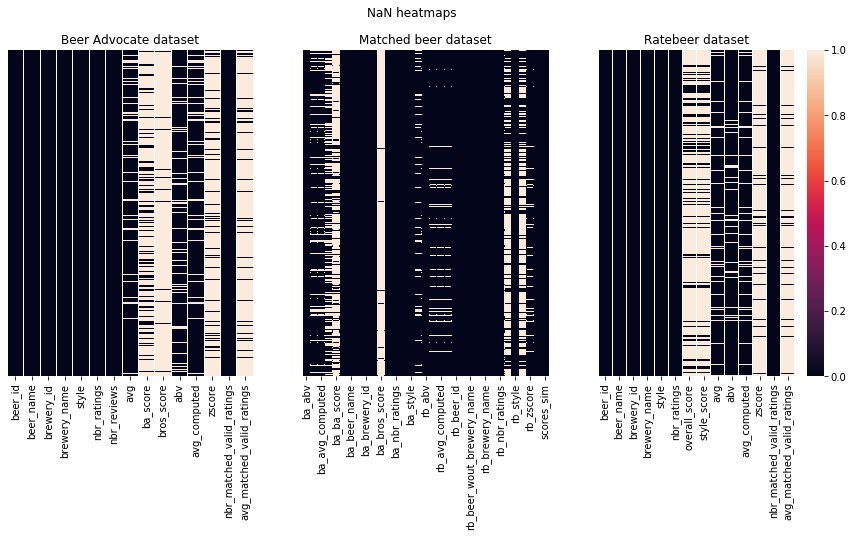

In [14]:
#We plot heatmaps for each dataset showing in white where there are NaN values (black: no NaN values)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(15,6))
plt.suptitle('NaN heatmaps')
ax1.title.set_text('Beer Advocate dataset')
ax2.title.set_text('Matched beer dataset')
ax3.title.set_text('Ratebeer dataset')
sns.heatmap(df_adv_beer.isna(),ax=ax1,cbar=False,yticklabels=False)
sns.heatmap(df_md_beer.isna(),ax=ax2,cbar=False,yticklabels=False)
sns.heatmap(df_rb_beer.isna(),ax=ax3,cbar=True,yticklabels=False)

print("Proportion of Na values for each column of the Beer Advocate beer dataset")
print((df_adv_beer.isna().sum()/df_adv_beer.shape[0]).sort_values(ascending=True))
print("Proportion of Na values for each column of the Matched beer beer dataset")
print((df_md_beer.isna().sum()/df_md_beer.shape[0]).sort_values(ascending=True))
print("Proportion of Na values for each column of the RateBeer beer dataset")
print((df_rb_beer.isna().sum()/df_rb_beer.shape[0]).sort_values(ascending=True))